In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pysindy as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from functions import LV, Solution, MI, FNN
from sindy_utils import sindy_library

MI and FNN criteria on Lotka-Volterra system

In [2]:
b1, b2, a12, a21 = 2/3, 1, 4/3, 1
h = 0.1
t = np.arange(0, 100, h)
n = len(t)
x0 = [1, 1.5]
xs, ys = Solution(LV, x0, t, [b1, b2, a12, a21])

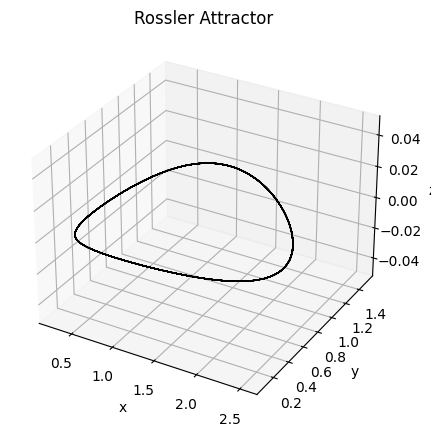

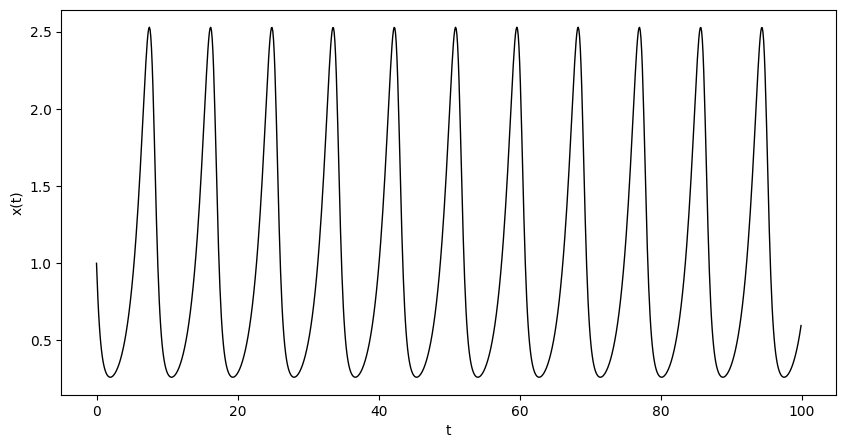

In [3]:
fig = plt.figure(figsize=(5, 9))
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot(xs, ys, lw=.9, color= 'k')
ax3d.set_title("Rossler Attractor")
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("z")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, xs, lw=1, color="k")
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
plt.show()

τ = 15
[7, 15, 20, 22, 24, 27, 32, 40, 42, 46, 48, 50, 55, 59, 62, 64, 66, 73, 87, 107, 111, 113, 115, 119, 124, 128, 131, 133, 135, 142, 146, 150, 164, 174, 192, 195, 197, 199, 202, 206, 209, 213, 216, 221, 225, 229, 232, 235, 240, 245, 252, 261, 283, 285, 288, 293, 299, 302, 306, 309, 312, 315, 321, 323, 325, 333, 347, 356, 363, 368, 374, 376, 379, 383, 388, 392, 395]


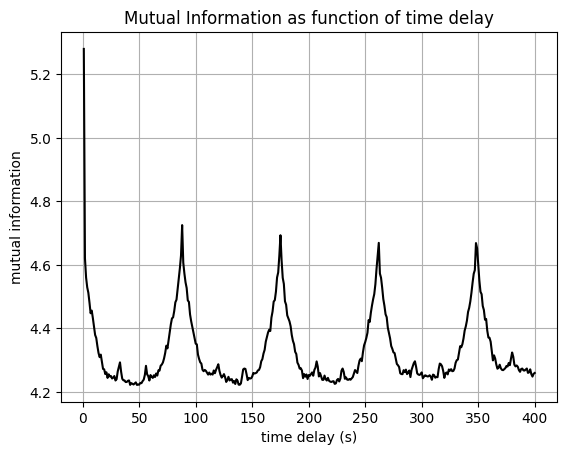

In [6]:
MI_vals = []
n = len(xs)
for i in range(400):
    v1 = xs[0: n - i]
    v2 = xs[i : n]
    MI_vals.append(MI(v1, v2, 400))

opt_index = []
opt_mi = []

for i in range(1, len(MI_vals)-1):
    if MI_vals[i] > MI_vals[i-1] and MI_vals[i] > MI_vals[i+1]:
        opt_index.append(i)
        opt_mi.append(MI_vals[i])

tau = opt_index[1]
print("τ =", tau)
print(opt_index)

plt.plot(np.arange(1,len(MI_vals)+1), MI_vals, color = 'k')
plt.xlabel('time delay (s)')
plt.ylabel('mutual information')
plt.title("Mutual Information as function of time delay")
plt.grid()
plt.show()

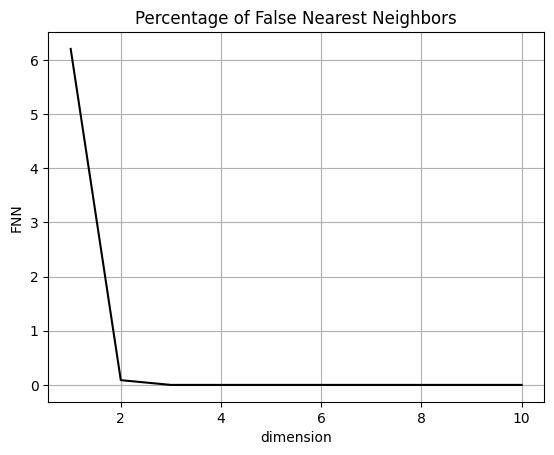

k = 2


In [5]:
eps = 0.5
k_vals = np.arange(1, 11)

per = FNN(xs, k_vals, eps, tau)
plt.plot(k_vals, per, color = 'k')
plt.grid()
plt.title("Percentage of False Nearest Neighbors")
plt.ylabel("FNN")
plt.xlabel("dimension")
plt.show()

print("k = 2")